# Module 11 Challenge
Levar McKnight<br/>
Data Analytics Bootcamp
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In [4]:
# Create a Beautiful Soup Object
html = browser.html
marsSoup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = marsSoup.find_all('tr', class_='data-row')
print(rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

In [6]:
# Create an empty list
tempList = []
# Loop through the scraped data to create a list of rows
for row in rows:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    tempList.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
marsTempDF = pd.DataFrame(tempList, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 
                                             'pressure'])

In [8]:
# Confirm DataFrame was created successfully
marsTempDF.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

In [9]:
# Examine data type of each column
marsTempDF.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
marsTempDF.id = marsTempDF.id.astype(int)                  
marsTempDF.terrestrial_date = pd.to_datetime(marsTempDF['terrestrial_date'])  
marsTempDF.sol = marsTempDF.sol.astype(int)
marsTempDF.ls = marsTempDF.ls.astype(int)
marsTempDF.month = marsTempDF.month.astype(int)
marsTempDF.min_temp = marsTempDF.min_temp.astype(float)
marsTempDF.pressure = marsTempDF.pressure.astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
marsTempDF.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In [12]:
# 1. How many months are there on Mars?
numberMonths = marsTempDF.groupby('month')
print(len(numberMonths))
numberMonths['month'].count()


12


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
len(marsTempDF.groupby('id'))

1867

In [14]:
# 3. What is the average low temperature by month?
avg = marsTempDF.groupby('month').mean()
avgMonthTemp = avg['min_temp']
avgMonthTemp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

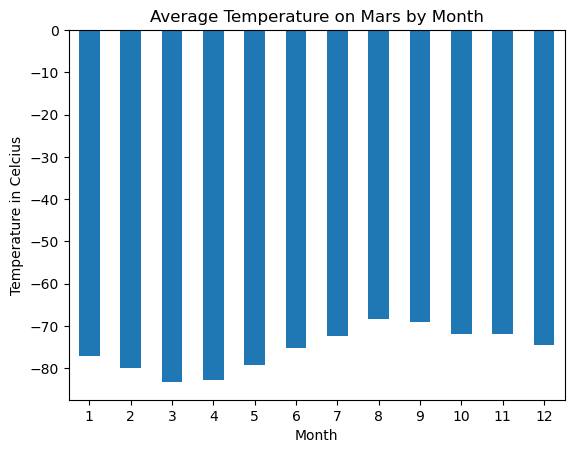

In [15]:
# Plot the average temperature by month
avgMonthTemp.plot.bar()
plt.title('Average Temperature on Mars by Month')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.show()

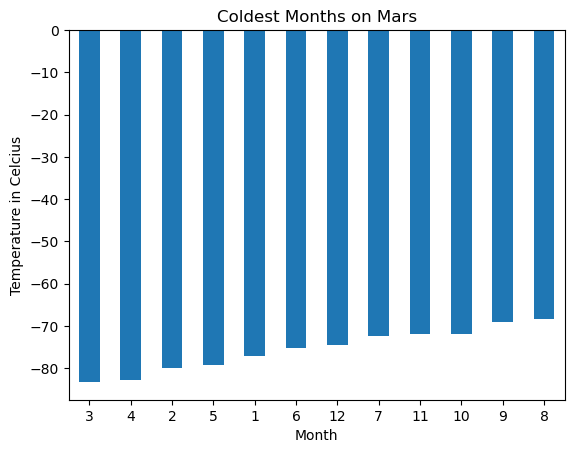

In [16]:
# Identify the coldest and hottest months in Curiosity's location
coldestMonth = avgMonthTemp.sort_values()
coldestMonth.plot.bar()
plt.title('Coldest Months on Mars')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.show()

Month 3 has the lowest average temperature. Month 8 has the highest average temperature.

In [17]:
# 4. Average pressure by Martian month
avgPressure = avg['pressure']
avgPressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

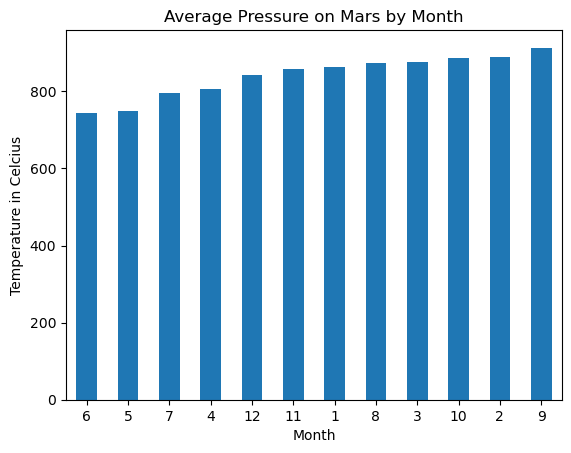

In [18]:
# Plot the average pressure by month
avgPressureChart = avgPressure.sort_values()
avgPressureChart.plot.bar()
plt.title('Average Pressure on Mars by Month')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.show()

Month 6 has the lowest atmospheric pressure.

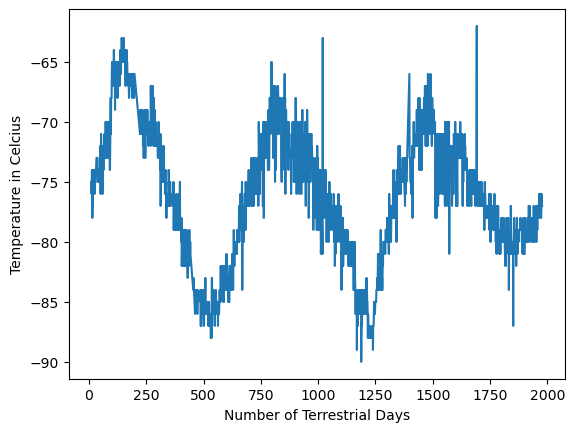

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earthDays = marsTempDF.sort_values('sol')
earthDays.plot(x='sol', y='min_temp', legend=None)
plt.xticks(rotation=0)
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Temperature in Celcius')
plt.show()

In [20]:
# Sort dates my minimum temperatures
tempYear = marsTempDF.sort_values('min_temp', ascending=False)
tempYear

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1582,1614,2017-05-10,1692,2,1,-62.0,820.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
138,60,2013-01-09,152,241,9,-63.0,914.0
129,50,2012-12-31,143,235,8,-63.0,908.0
95,12,2012-11-26,109,213,8,-64.0,844.0
...,...,...,...,...,...,...,...
1139,1166,2016-01-26,1234,99,4,-88.0,824.0
1142,1169,2016-01-29,1237,101,4,-88.0,820.0
1144,1168,2016-01-31,1239,102,4,-89.0,818.0
1074,1100,2015-11-20,1169,70,3,-89.0,894.0


In [21]:
# Take the difference between the top two dates in the same month and calculate the Earth year based on temperature
earthDays = dt.date(2017, 5, 10) - dt.date(2015, 6, 20)
finalEarthDays = earthDays + dt.timedelta(days=1) # Includes end date
finalEarthDays

datetime.timedelta(days=691)

As calculated by using minimum temperatures, a Martian year is 691 Earth days.  According to NASA, a Martian year
lasts 687 Earth days.

### Step 6: Save the Data

In [22]:
# Write the data to a CSV
marsTempDF.to_csv('Output/marsTemp.csv', index=True)

In [23]:
browser.quit()